In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load train and test dataset

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Preprocessing data

In [11]:
dataset=[train,test]

In [12]:
for data in dataset:
    data.drop(['Loan_ID'],axis=1,inplace=True)

In [13]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
#filling null values for numeric data type column with the mean values
dataset=[train,test]
for data in dataset:
    data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
    data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
    data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [16]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
train['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [18]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#filling categorical datatype columns 
dataset=[train,test]
for data in dataset:
    data['Gender'].ffill(inplace=True)
    data['Married'].ffill(inplace=True)
    data['Dependents'].ffill(inplace=True)
    data['Self_Employed'].bfill(inplace=True)
    

In [21]:
#checking the values ccounts of every single categorial cplumn
print(train['Gender'].value_counts())
print(train['Married'].value_counts())
print(train['Dependents'].value_counts())
print(train['Self_Employed'].value_counts())

Male      500
Female    114
Name: Gender, dtype: int64
Yes    400
No     214
Name: Married, dtype: int64
0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64
No     528
Yes     86
Name: Self_Employed, dtype: int64


# Preprocessing dataset 
correlation and univariate analysis

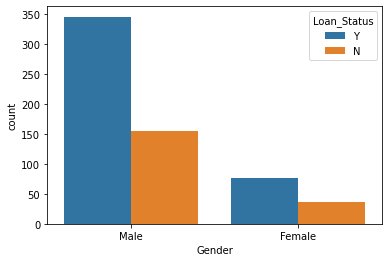

In [22]:
sns.countplot(train['Gender'],hue=train['Loan_Status'])

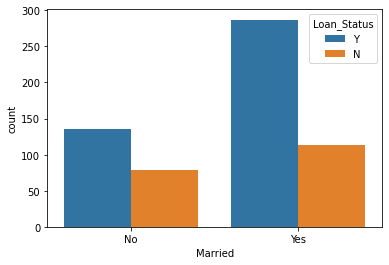

In [23]:
sns.countplot(train['Married'],hue=train['Loan_Status'])

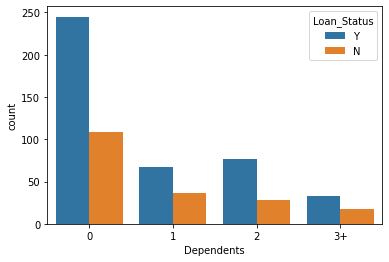

In [24]:
sns.countplot(train['Dependents'],hue=train['Loan_Status'])

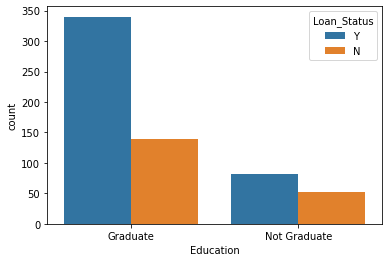

In [25]:
sns.countplot(train['Education'],hue=train['Loan_Status'])

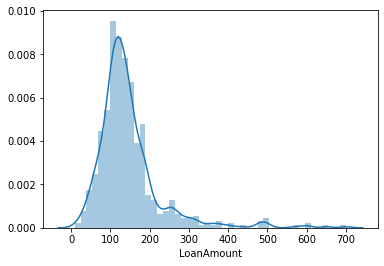

In [26]:
sns.distplot(train['LoanAmount'])

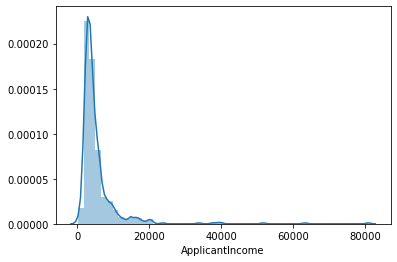

In [27]:
sns.distplot(train['ApplicantIncome'])

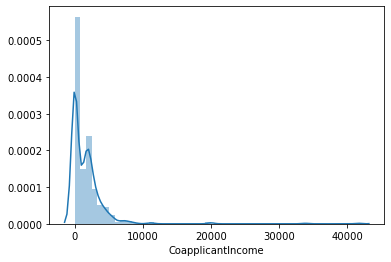

In [28]:
sns.distplot(train['CoapplicantIncome'])

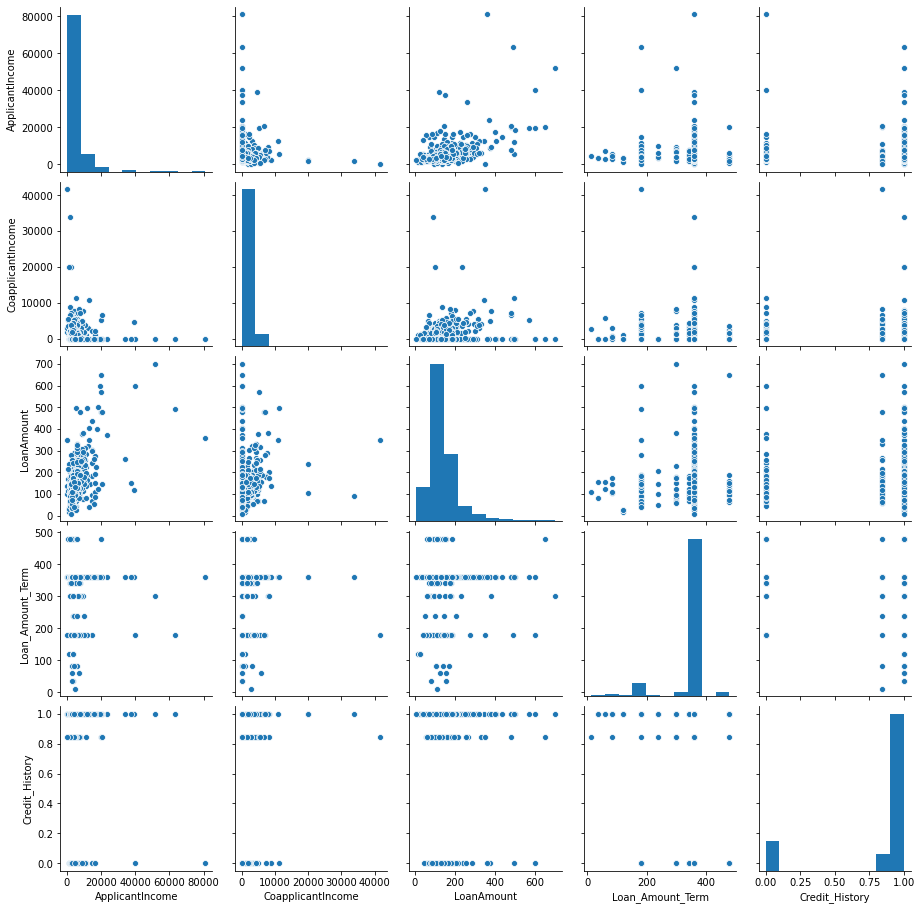

In [29]:
sns.pairplot(data=train)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


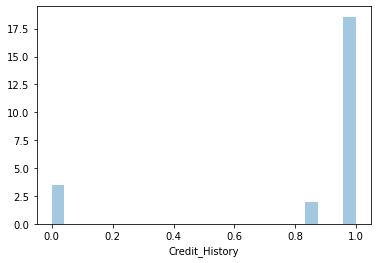

In [30]:
sns.distplot(train['Credit_History'])

In [31]:
#we use log function to make right or left skewed to be normal distribution which is best for training model
dataset=[train,test]
for data in dataset:
    data['ApplicantIncome']=np.log(data['ApplicantIncome'])
    data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])
    data['LoanAmount']=np.log(data['LoanAmount'])
    data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term'])
    

C:\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


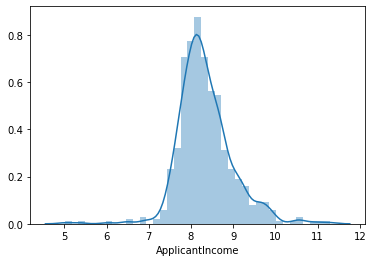

In [32]:
sns.distplot(train['ApplicantIncome'])

In [33]:
train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341213,-inf,4.862066,5.802065,0.842199
std,0.645263,NaN,0.496575,0.312482,0.349681
min,5.010635,-inf,2.197225,2.484907,0.000000
25%,7.964677,-inf,4.607658,5.886104,1.000000
50%,8.246040,7.080284,4.859812,5.886104,1.000000
75%,8.664750,7.739462,5.104426,5.886104,1.000000
max,11.302204,10.637465,6.551080,6.173786,1.000000


In [34]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,-inf,4.262680,5.886104,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,-inf,3.688879,5.192957,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,5.886104,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,-inf,5.231109,5.886104,1.0,Urban,Y


In [35]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,8.651724,-inf,4.700480,5.886104,1.000000,Urban
1,Male,Yes,1,Graduate,No,8.031385,7.313220,4.836282,5.886104,1.000000,Urban
2,Male,Yes,2,Graduate,No,8.517193,7.495542,5.337538,5.886104,1.000000,Urban
3,Male,Yes,2,Graduate,No,7.757906,7.842279,4.605170,5.886104,0.825444,Urban
4,Male,No,0,Not Graduate,No,8.094378,-inf,4.356709,5.886104,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,8.296297,7.482682,4.727388,5.886104,1.000000,Urban
363,Male,Yes,0,Graduate,No,8.332789,6.563856,4.744932,5.886104,1.000000,Urban
364,Male,No,0,Graduate,No,8.086410,7.597396,4.836282,5.886104,0.825444,Semiurban
365,Male,Yes,0,Graduate,No,8.517193,7.780303,5.062595,5.886104,1.000000,Rural


In [36]:
train.drop(['CoapplicantIncome'],inplace=True,axis=1)
test.drop(['CoapplicantIncome'],inplace=True,axis=1)

In [38]:
train.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000
mean,8.341213,4.862066,5.802065,0.842199
std,0.645263,0.496575,0.312482,0.349681
min,5.010635,2.197225,2.484907,0.000000
25%,7.964677,4.607658,5.886104,1.000000
50%,8.246040,4.859812,5.886104,1.000000
75%,8.664750,5.104426,5.886104,1.000000
max,11.302204,6.551080,6.173786,1.000000


In [39]:
test.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000
mean,-inf,4.828181,5.795568,0.825444
std,NaN,0.416311,0.382451,0.364778
min,-inf,3.332205,1.791759,0.000000
25%,7.959974,4.615121,5.886104,1.000000
50%,8.239065,4.836282,5.886104,1.000000
75%,8.529122,5.059420,5.886104,1.000000
max,11.191742,6.309918,6.173786,1.000000


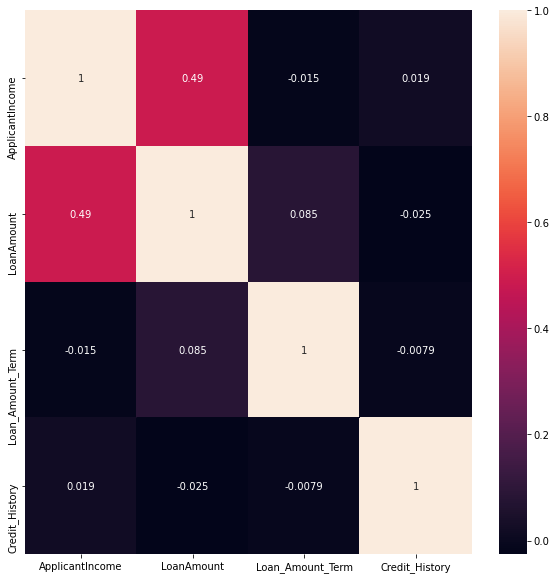

In [40]:
corr=train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

# Label Enconding

In [41]:
from sklearn.preprocessing import LabelEncoder
columns=['Gender','Married','Dependents','Self_Employed','Property_Area','Education']
le=LabelEncoder()
dataset=[train,test]

In [42]:
#fit transform fit label encoder and return encoded labels
for data in dataset:
    for c in columns:
        data[c]=le.fit_transform(data[c])

In [43]:
train['Loan_Status']=le.fit_transform(train['Loan_Status'])

In [44]:
#Education attribute has only two value 0 and 1
train['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [45]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1.0,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1.0,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1.0,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1.0,2,1


In [46]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,8.651724,4.700480,5.886104,1.000000,2
1,1,1,1,0,0,8.031385,4.836282,5.886104,1.000000,2
2,1,1,2,0,0,8.517193,5.337538,5.886104,1.000000,2
3,1,1,2,0,0,7.757906,4.605170,5.886104,0.825444,2
4,1,0,0,1,0,8.094378,4.356709,5.886104,1.000000,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,8.296297,4.727388,5.886104,1.000000,2
363,1,1,0,0,0,8.332789,4.744932,5.886104,1.000000,2
364,1,0,0,0,0,8.086410,4.836282,5.886104,0.825444,1
365,1,1,0,0,0,8.517193,5.062595,5.886104,1.000000,0


In [48]:
train['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [49]:
train['Credit_History']=train['Credit_History'].astype(dtype='int64')
test['Credit_History']=test['Credit_History'].astype(dtype='int64')

In [50]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1,2,1


# TRAIN-TEST SPLIT

In [51]:
x=train.iloc[:,0:10].values

In [52]:
y=train.iloc[:,10].values

In [53]:
test.loc[test['ApplicantIncome']==-np.inf]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,1,0,0,0,0,-inf,4.997212,5.886104,0,0
116,0,0,0,1,0,-inf,5.192957,5.886104,1,1


# REPLACING inf VALUES WITH NaN

In [54]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [55]:
test.dropna(inplace=True)

# MODEL TRAINING

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#checking accuracy for logistic regression
logreg = LogisticRegression()
logreg.fit(x,y)
Y_pred = logreg.predict(test.values)
acc_log = round(logreg.score(x,y) * 100, 2)
print(round(acc_log,2,), "%")

77.04 %


In [59]:
acc_log = (logreg.score(x,y) * 100)

print(acc_log)

77.0358306188925


In [60]:
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [62]:
# check accuracy using k nearest classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x,y)

Y_pred = knn.predict(x)

acc_knn = round(knn.score(x,y) * 100, 2)
print(round(acc_knn,2,), "%")

80.13 %


In [63]:
#performance metrics for classification problems
from sklearn.metrics import precision_score, recall_score
print("precision:", precision_score(y,Y_pred))
print("Recall:",recall_score(y,Y_pred))

precision: 0.8061224489795918
Recall: 0.9360189573459715


In [64]:
#performance metrics for classification problem
from sklearn.metrics import f1_score
f1_score(y,Y_pred)

0.8662280701754386

# Confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,Y_pred)

array([[ 97,  95],
       [ 27, 395]], dtype=int64)

# pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg, open('log_model.pkl', 'wb'))

In [ ]:
l=logreg.predict([[1,1,1,0,0,8.612345678901234,4.612345678901234,6.612345678901234,1,2]])

In [ ]:
map={1:"Yes",0:"No"}

In [ ]:
map

In [ ]:
a=pickle.load(open('log_model.pkl','rb'))

In [ ]:
b=a.predict([[1,1,1,0,0,8.612345678901234,4.612345678901234,6.612345678901234,1,2]])

In [73]:
val=int(b)
print('LOAN APPROVED', map[val])

LOAN APPROVED Yes
